In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [26]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (3000, 18)
Test shape: (3000, 17)


In [27]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [28]:
def missing_ratio(df):
    return (df.isnull().mean() * 100).round(2)

summary = pd.DataFrame({
    'Data Type': train.dtypes,
    'Missing %': missing_ratio(train),
    'Unique Count' : train.nunique()
})

summary.sort_values("Missing %", ascending=False)

,Data Type,Missing %,Unique Count
family_medical_history,object,49.53,3
medical_history,object,42.97,3
mean_working,float64,34.40,13
edu_level,object,20.23,3
gender,object,0.00,2
ID,object,0.00,3000
age,int64,0.00,73
height,float64,0.00,1828
weight,float64,0.00,1986
cholesterol,float64,0.00,2215


In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00
stress_score,3000.0,0.482130,0.288252,0.00,0.2300,0.480,0.7300,1.00


In [30]:
cat_cols = train.select_dtypes(include='object').columns.drop('ID')

for col in cat_cols:
    print(f"\n▶ {col} value counts:")
    print(train[col].value_counts().head())


▶ gender value counts:
gender
F    1508
M    1492
Name: count, dtype: int64

▶ activity value counts:
activity
moderate    1431
light        894
intense      675
Name: count, dtype: int64

▶ smoke_status value counts:
smoke_status
ex-smoker         1177
non-smoker        1039
current-smoker     784
Name: count, dtype: int64

▶ medical_history value counts:
medical_history
high blood pressure    697
heart disease          508
diabetes               506
Name: count, dtype: int64

▶ family_medical_history value counts:
family_medical_history
diabetes               615
high blood pressure    480
heart disease          419
Name: count, dtype: int64

▶ sleep_pattern value counts:
sleep_pattern
normal              1557
sleep difficulty    1019
oversleeping         424
Name: count, dtype: int64

▶ edu_level value counts:
edu_level
high school diploma    924
bachelors degree       880
graduate degree        589
Name: count, dtype: int64


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

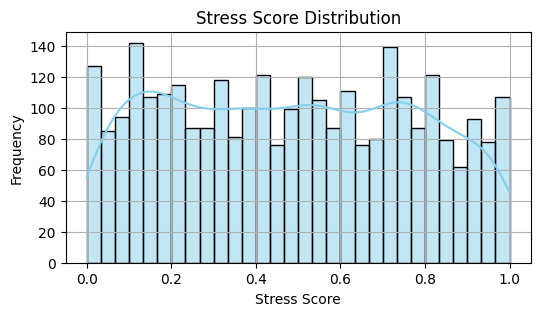

In [32]:
plt.figure(figsize=(6, 3))
sns.histplot(train["stress_score"], bins=30, kde=True, color="skyblue")
plt.title("Stress Score Distribution")
plt.xlabel("Stress Score")
plt.ylabel("Frequency")
plt.grid(True)

In [33]:
from scipy.stats import skew, kurtosis

target = train["stress_score"]
print(target.describe())

print(f"Skewness (왜도): {skew(target):.2f}")
print(f"Kurtosis (첨도): {kurtosis(target):.2f}")

count    3000.000000
mean        0.482130
std         0.288252
min         0.000000
25%         0.230000
50%         0.480000
75%         0.730000
max         1.000000
Name: stress_score, dtype: float64
Skewness (왜도): 0.06
Kurtosis (첨도): -1.19


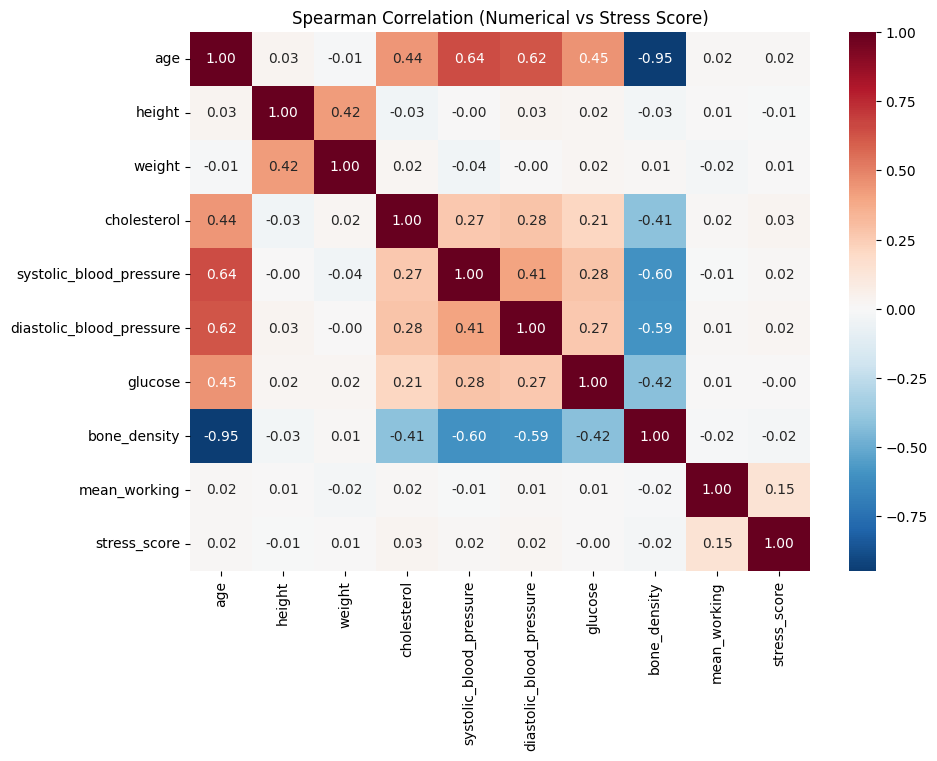

mean_working                0.145073
cholesterol                 0.026804
diastolic_blood_pressure    0.019255
age                         0.019001
systolic_blood_pressure     0.017789
weight                      0.007825
glucose                    -0.003056
height                     -0.010767
bone_density               -0.022841
Name: stress_score, dtype: float64

In [34]:
num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")

corr_matrix = train[num_cols.tolist() + ["stress_score"]].corr(method="spearman")

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Spearman Correlation (Numerical vs Stress Score)")
plt.show()

corr_matrix["stress_score"].drop("stress_score").sort_values(ascending=False)

In [35]:
# 혈관 건강 점수 (평균)
train["vascular_health"] = train[["cholesterol", "systolic_blood_pressure", "diastolic_blood_pressure", "glucose"]].mean(axis=1)

# 뼈 건강 지표
train["bone_risk"] = -train["bone_density"]  # 낮을수록 위험하므로 음수 처리

# BMI
train["BMI"] = train["weight"] / ((train["height"] / 100) ** 2)

# 혈압 차이
train["bp_diff"] = train["systolic_blood_pressure"] - train["diastolic_blood_pressure"]

In [36]:
derived_cols = ["vascular_health", "bone_risk", "BMI", "bp_diff"]
corr_derived = train[derived_cols + ["stress_score"]].corr(method="spearman")
corr_derived["stress_score"].sort_values(ascending=False)

stress_score       1.000000
bone_risk          0.022841
vascular_health    0.022204
BMI                0.016798
bp_diff            0.006089
Name: stress_score, dtype: float64

In [37]:
corr_derived = train[derived_cols + ["age"]].corr(method="spearman")
corr_derived["age"].sort_values(ascending=False)

age                1.000000
bone_risk          0.946491
vascular_health    0.762090
bp_diff            0.269040
BMI               -0.036497
Name: age, dtype: float64

In [38]:
high_threshold = train["stress_score"].quantile(0.75)
low_threshold = train["stress_score"].quantile(0.25)

train["stress_group"] = train["stress_score"].apply(
    lambda x: "high" if x >= high_threshold else ("low" if x <= low_threshold else "mid")
)

In [39]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,...,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score,vascular_health,bone_risk,BMI,bp_diff,stress_group
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,...,diabetes,sleep difficulty,bachelors degree,NaN,0.63,172.0475,-0.87,22.420321,65,mid
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,...,diabetes,normal,graduate degree,NaN,0.83,173.3275,-0.07,23.985250,67,high
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,...,NaN,normal,high school diploma,9.0,0.70,149.5675,-1.18,27.009817,39,mid
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,...,NaN,oversleeping,graduate degree,NaN,0.17,148.5000,-0.48,19.884564,66,low
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,...,diabetes,sleep difficulty,bachelors degree,NaN,0.36,168.0725,-0.34,26.391876,55,mid


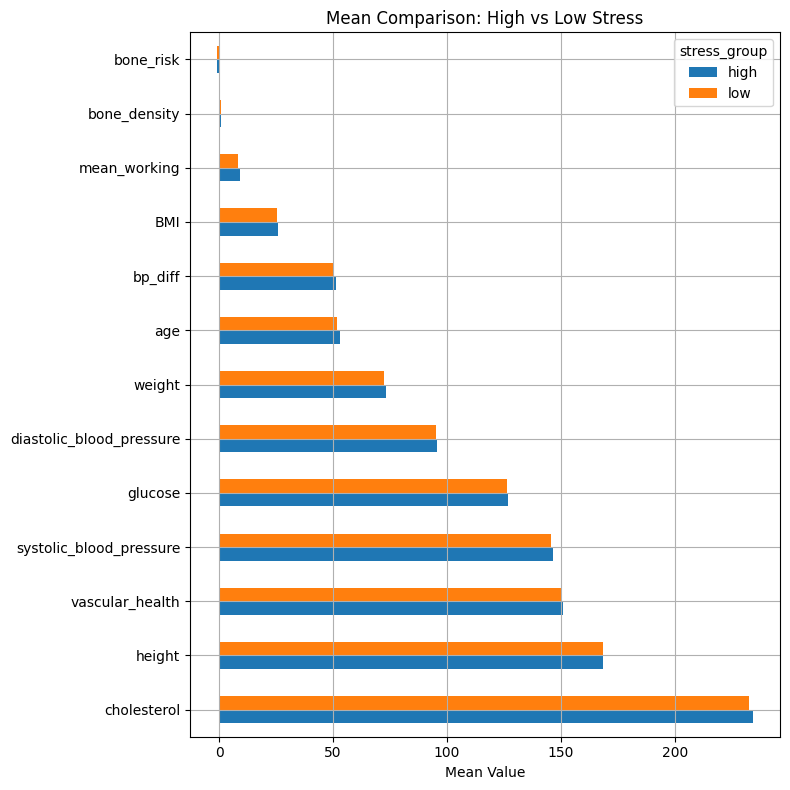

In [40]:
num_cols = train.select_dtypes(include=[np.number]).columns.drop(["stress_score"])

group_mean = train[train["stress_group"].isin(["high", "low"])]\
    .groupby("stress_group")[num_cols]\
    .mean().T.sort_values("high", ascending=False)

import matplotlib.pyplot as plt

group_mean.plot(kind="barh", figsize=(8, 8), title="Mean Comparison: High vs Low Stress")
plt.xlabel("Mean Value")
plt.grid(True)
plt.tight_layout()

In [ ]:
cat_cols = train.select_dtypes(include='object').columns.drop(["ID"])

# 범주형 변수 비율 비교 (오류 없는 안전 버전)
for col in cat_cols:
    if col not in train.columns:
        continue
    print(f"\n▶ {col} 비율 비교 (high vs low):")
    freq = (
        train[train["stress_group"].isin(["high", "low"])]
        .groupby(["stress_group", col])
        .size()
        .unstack()
        .fillna(0)
    )

    # 비율로 변환
    freq_ratio = (freq.T / freq.sum(axis=1)).T.round(3)
    display(freq_ratio)


▶ gender 비율 비교 (high vs low):


gender,F,M
stress_group,,
high,0.502,0.498
low,0.496,0.504



▶ activity 비율 비교 (high vs low):


activity,intense,light,moderate
stress_group,,,
high,0.239,0.284,0.477
low,0.220,0.304,0.476



▶ smoke_status 비율 비교 (high vs low):


smoke_status,current-smoker,ex-smoker,non-smoker
stress_group,,,
high,0.301,0.351,0.347
low,0.246,0.411,0.343



▶ medical_history 비율 비교 (high vs low):


medical_history,diabetes,heart disease,high blood pressure
stress_group,,,
high,0.295,0.278,0.427
low,0.283,0.319,0.398



▶ family_medical_history 비율 비교 (high vs low):


family_medical_history,diabetes,heart disease,high blood pressure
stress_group,,,
high,0.377,0.273,0.35
low,0.382,0.307,0.31



▶ sleep_pattern 비율 비교 (high vs low):


sleep_pattern,normal,oversleeping,sleep difficulty
stress_group,,,
high,0.541,0.123,0.336
low,0.524,0.166,0.311



▶ edu_level 비율 비교 (high vs low):


edu_level,bachelors degree,graduate degree,high school diploma
stress_group,,,
high,0.359,0.266,0.374
low,0.398,0.242,0.360



▶ stress_group 비율 비교 (high vs low):


stress_group,high,low
stress_group,,
high,1.0,0.0
low,0.0,1.0


In [43]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.000000,35.000000,53.000000,72.000000,89.000000
height,3000.0,168.585687,9.351876,141.130000,161.800000,168.115000,175.352500,195.280000
weight,3000.0,72.486680,13.167222,36.320000,63.035000,71.240000,81.832500,120.880000
cholesterol,3000.0,233.910523,24.333434,148.810000,216.927500,234.255000,250.377500,313.350000
systolic_blood_pressure,3000.0,146.144333,15.845310,97.000000,135.000000,146.000000,158.000000,191.000000
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.000000,89.000000,95.000000,102.000000,124.000000
glucose,3000.0,126.467720,18.536844,70.050000,113.912500,126.555000,139.180000,185.740000
bone_density,3000.0,0.933367,0.444783,-0.220000,0.560000,0.940000,1.300000,2.000000
mean_working,1968.0,8.716972,1.628944,4.000000,8.000000,9.000000,10.000000,16.000000
stress_score,3000.0,0.482130,0.288252,0.000000,0.230000,0.480000,0.730000,1.000000


In [44]:
# 상하위 10% 기준으로 새 stress group 만들기
high_10 = train["stress_score"].quantile(0.90)
low_10 = train["stress_score"].quantile(0.10)

train["stress_group_10"] = train["stress_score"].apply(
    lambda x: "high" if x >= high_10 else ("low" if x <= low_10 else "mid")
)

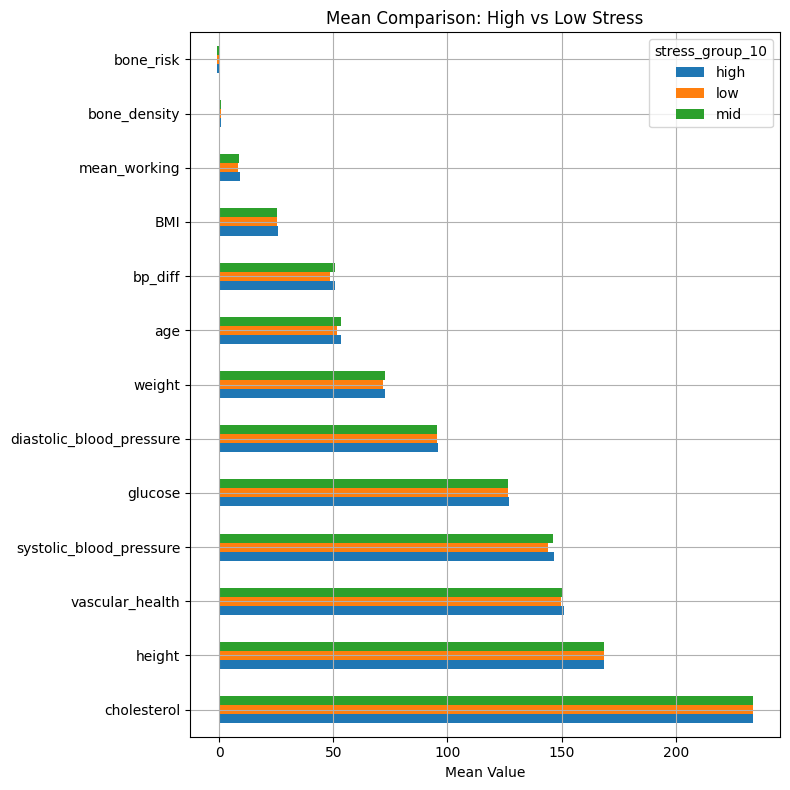

In [47]:
group_mean = train[train["stress_group_10"].isin(["high","mid", "low"])]\
    .groupby("stress_group_10")[num_cols]\
    .mean().T.sort_values("high", ascending=False)

import matplotlib.pyplot as plt

group_mean.plot(kind="barh", figsize=(8, 8), title="Mean Comparison: High vs Low Stress")
plt.xlabel("Mean Value")
plt.grid(True)
plt.tight_layout()

In [48]:
train["stress_bin"] = (train["stress_score"] >= 0.8).astype(int)

In [49]:
X = train.drop(columns=["ID", "stress_score", "stress_group", "stress_group_10", "stress_bin"])
y = train["stress_bin"]

In [53]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))

In [56]:
X

,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,vascular_health,bone_risk,BMI,bp_diff
0,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,172.0475,-0.87,22.420321,65
1,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,173.3275,-0.07,23.985250,67
2,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,149.5675,-1.18,27.009817,39
3,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,148.5000,-0.48,19.884564,66
4,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,168.0725,-0.34,26.391876,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,87,174.43,77.14,233.31,176,111,134.71,0.20,light,non-smoker,NaN,NaN,oversleeping,NaN,NaN,163.7550,-0.20,25.353462,65
2996,M,25,171.44,51.67,196.89,143,86,111.91,1.75,moderate,current-smoker,NaN,NaN,normal,high school diploma,9.0,134.4500,-1.75,17.579809,57
2997,F,54,162.13,55.54,210.52,164,91,136.47,0.80,light,current-smoker,NaN,NaN,normal,NaN,9.0,150.4975,-0.80,21.129008,73
2998,M,70,181.32,82.20,234.10,182,91,144.89,0.58,moderate,non-smoker,NaN,NaN,oversleeping,high school diploma,NaN,162.9975,-0.58,25.002325,91


In [58]:
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# 1. 범주형 변수 라벨 인코딩 (object → int)
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# 2. 모델 정의 및 성능 평가 (AUC 기준)
model = LGBMClassifier(random_state=42)
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='roc_auc')

print(f"평균 AUC: {scores.mean():.5f}")
print(f"Fold 별 AUC: {scores}")

[LightGBM] [Info] Number of positive: 432, number of negative: 1968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2229
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180000 -> initscore=-1.516347
[LightGBM] [Info] Start training from score -1.516347
[LightGBM] [Info] Number of positive: 432, number of negative: 1968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2222
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180000 -> initscore=-1.516347
[LightGBM] [Info] Start training from score -1.516347
[LightGBM] [Info] Nu

In [60]:
# 학습
model.fit(X_encoded, y)

# 예측 확률값 (stress가 1일 확률)
pred_proba = model.predict_proba(X_encoded)[:, 1]

# MAE 계산
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(train["stress_score"], pred_proba)
print(f"예측 확률 기반 MAE: {mae:.5f}")

[LightGBM] [Info] Number of positive: 540, number of negative: 2460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2237
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180000 -> initscore=-1.516347
[LightGBM] [Info] Start training from score -1.516347
예측 확률 기반 MAE: 0.30905
